In [447]:
import copy, math
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('./deeplearning.mplstyle')
np.set_printoptions(precision=2)  # reduced display precision on numpy arrays

<a name="toc_15456_2"></a>
# 2 Problem Statement

You will use the motivating example of housing price prediction. The training dataset contains three examples with four features (size, bedrooms, floors and, age) shown in the table below.  Note that, unlike the earlier labs, size is in sqft rather than 1000 sqft. This causes an issue, which you will solve in the next lab!

| Size (sqft) | Number of Bedrooms  | Number of floors | Age of  Home | Price (1000s dollars)  |   
| ----------------| ------------------- |----------------- |--------------|-------------- |  
| 2104            | 5                   | 1                | 45           | 460           |  
| 1416            | 3                   | 2                | 40           | 232           |  
| 852             | 2                   | 1                | 35           | 178           |  

You will build a linear regression model using these values so you can then predict the price for other houses. For example, a house with **1200 sqft, 3 bedrooms, 1 floor, 40 years old.**  

Please run the following code cell to create your `X_train` and `y_train` variables.

In [448]:
x_train = np.array([[2104,5, 1, 45], [1416, 3, 2, 40], [852, 2, 1, 35]])
y_train = np.array([460, 232, 178])
for i, array in enumerate(x_train):
    if i==2:
        print(x_train[i], '    |', [y_train[i]])        
    else:
        print(x_train[i], '|', [y_train[i]])

[2104    5    1   45] | [460]
[1416    3    2   40] | [232]
[852   2   1  35]     | [178]


<a name="toc_15456_2.1"></a>
## 2.1 Matrix X containing our examples
Similar to the table above, examples are stored in a NumPy matrix `X_train`. Each row of the matrix represents one example. When you have $m$ training examples ( $m$ is three in our example), and there are $n$ features (four in our example), $\mathbf{X}$ is a matrix with dimensions ($m$, $n$) (m rows, n columns).


$$\mathbf{X} = 
\begin{pmatrix}
 x^{(0)}_0 & x^{(0)}_1 & \cdots & x^{(0)}_{n-1} \\ 
 x^{(1)}_0 & x^{(1)}_1 & \cdots & x^{(1)}_{n-1} \\
 \cdots \\
 x^{(m-1)}_0 & x^{(m-1)}_1 & \cdots & x^{(m-1)}_{n-1} 
\end{pmatrix}
$$
notation:
- $\mathbf{x}^{(i)}$ is vector containing example i. $\mathbf{x}^{(i)}$ $ = (x^{(i)}_0, x^{(i)}_1, \cdots,x^{(i)}_{n-1})$
- $x^{(i)}_j$ is element j in example i. The superscript in parenthesis indicates the example number while the subscript represents an element.  

Display the input data.

In [449]:
print(f'x shape: {x_train.shape}, x_data type: {x_train.dtype}')
print('x:',x_train)
print(f'y shape: {y_train.shape}, y_data type: {y_train.dtype}') 
print('y:',y_train)

x shape: (3, 4), x_data type: int32
x: [[2104    5    1   45]
 [1416    3    2   40]
 [ 852    2    1   35]]
y shape: (3,), y_data type: int32
y: [460 232 178]


<a name="toc_15456_2.2"></a>
## 2.2 Parameter vector w, b

* $\mathbf{w}$ is a vector with $n$ elements.
  - Each element contains the parameter associated with one feature.
  - in our dataset, n is 4.
  - notionally, we draw this as a column vector

$$\mathbf{w} = \begin{pmatrix}
w_0 \\ 
w_1 \\
\cdots\\
w_{n-1}
\end{pmatrix}
$$
* $b$ is a scalar parameter.  

For desmostration, we will use the following values for $\mathbf{w}$ and $b$:

In [450]:
b_init = 785.1811367994083
w_init = np.array([ 0.39133535, 18.75376741, -53.36032453, -26.42131618])
print(f"w_init shape: {w_init.shape}, b_init type: {type(b_init)}")

w_init shape: (4,), b_init type: <class 'float'>


<a name="toc_15456_3"></a>
# 3 Model Prediction With Multiple Variables
The model's prediction with multiple variables is given by the linear model:

$$ f_{\mathbf{w},b}(\mathbf{x}) =  w_0x_0 + w_1x_1 +... + w_{n-1}x_{n-1} + b \tag{1}$$
or in vector notation:
$$ f_{\mathbf{w},b}(\mathbf{x}) = \mathbf{w} \cdot \mathbf{x} + b  \tag{2} $$ 
where $\cdot$ is a vector `dot product`

To demonstrate the dot product, we will implement prediction using (1) and (2).

<a name="toc_15456_3.1"></a>
## 3.1 Single Prediction element by element
Our previous prediction multiplied one feature value by one parameter and added a bias parameter. A direct extension of our previous implementation of prediction to multiple features would be to implement (1) above using loop over each element, performing the multiply with its parameter and then adding the bias parameter at the end.

(Predict a single row)

In [451]:
def predict(X, w, b):
    return np.dot(X, w) + b # dot product

In [452]:
def raw_predict(x, w, b):
    f = 0
    n = x.shape[0] # array length
    for i in range(n):
        f_i = w[i]*x[i] 
        f += f_i
    f += b
    
    return f

In [453]:
# get a row from our training data
x_vec = x_train[0,:]

print(f"x_vec shape {x_vec.shape}, x_vec value: {x_vec}")

x_vec shape (4,), x_vec value: [2104    5    1   45]


In [454]:
import timeit

# Compare numpy with raw code
fwb = predict(x_vec, w_init, b_init)
rfwb = raw_predict(x_vec, w_init, b_init)

# Timing the predict function
time_predict = timeit.timeit(lambda: predict(x_vec, w_init, b_init), number=1000)

# Timing the raw_predict function
time_raw_predict = timeit.timeit(lambda: raw_predict(x_vec, w_init, b_init), number=1000)

print('predict: ', fwb)
print('raw: ', rfwb)
print(f"Time for predict function: {time_predict:.6f} seconds")
print(f"Time for raw_predict function: {time_raw_predict:.6f} seconds")

predict:  459.9999976194083
raw:  459.9999976194083
Time for predict function: 0.003038 seconds
Time for raw_predict function: 0.002633 seconds


<a name="toc_15456_4"></a>
# 4 Compute Cost With Multiple Variables
The equation for the cost function with multiple variables $J(\mathbf{w},b)$ is:
$$J(\mathbf{w},b) = \frac{1}{2m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)})^2 \tag{3}$$ 
where:
$$ f_{\mathbf{w},b}(\mathbf{x}^{(i)}) = \mathbf{w} \cdot \mathbf{x}^{(i)} + b  \tag{4} $$ 

In contrast to previous labs, $\mathbf{w}$ and $\mathbf{x}^{(i)}$ are vectors rather than scalars supporting multiple features.


In [455]:
def fbw(w, x, b):
    """
        w: 1-D array
        x: 1-D array
        b: integer
        
        return float
    """
    return np.dot(x, w) + b

In [456]:
def compute_cost(x, y, w, b):
    """
        Compute Multivariable Vector Array
        X: m by n matrix (3, 4)
        Y: n value array (:, 4)
        b: integer (1)
        w: n value array (:, 4)
        note: cost represent J(w, b) before dividing m
        
        return 
            cost (scalar): cost (scalar mean single value)
    """
    cost = 0.0
    m = x.shape[0] # row length
    
    for i in range(m):
        # x[i] is a row from x matrix 
        fwb_i = np.dot(x[i], w) + b
        cost = cost + (fwb_i - y[i])**2    
        
        
    return cost/(2*m)

In [457]:
cost = compute_cost(x_train, y_train, w_init, b_init)
print(x_train, y_train, w_init, b_init)
print(f'Cost at optimal w: {cost}')

[[2104    5    1   45]
 [1416    3    2   40]
 [ 852    2    1   35]] [460 232 178] [  0.39  18.75 -53.36 -26.42] 785.1811367994083
Cost at optimal w: 1.5578904045996674e-12


<a name="toc_15456_5"></a>
# 5 Gradient Descent With Multiple Variables
Gradient descent for multiple variables:

$$\begin{align*} \text{repeat}&\text{ until convergence:} \; \lbrace \newline\;
& w_j = w_j -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial w_j} \tag{5}  \; & \text{for j = 0..n-1}\newline
&b\ \ = b -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial b}  \newline \rbrace
\end{align*}$$

where, n is the number of features, parameters $w_j$,  $b$, are updated simultaneously and where  

$$
\begin{align}
\frac{\partial J(\mathbf{w},b)}{\partial w_j}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)})x_{j}^{(i)} \tag{6}  \\
\frac{\partial J(\mathbf{w},b)}{\partial b}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)}) \tag{7}
\end{align}
$$
* m is the number of training examples in the data set
* $x_{j}^{(i)}$: x value of feature j (column) in example i (row)
* $y^{(i)}$: target value of example i
*  $f_{\mathbf{w},b}(\mathbf{x}^{(i)})$ is the model's prediction, while $y^{(i)}$ is the target value


In [484]:
def dJdw(x, y, w, b):
    m, n = x.shape
    dw = np.zeros((n))
    
    for i in range(m):
        fwb = np.dot(x[i], w) + b
        cost = np.dot(fwb - y[i], x[i, :])
        dw += cost
    
    return dw/m 

def dJdb(x, y, w, b):
    m = x.shape[0]
    db = 0
    
    for i in range(m):
        fwb = np.dot(x[i], w) + b
        cost = fwb - y[i]
        db += cost
        
    return db/m

print(dJdw(x_train, y_train, w_init, b_init))
print(dJdb(x_train, y_train, w_init, b_init))


[-2.73e-03 -6.27e-06 -2.22e-06 -6.92e-05]
-1.6739251122999121e-06


In [458]:
m, n = np.shape(x_train)
print(x_train)
for i in range(m):
    print(f'Get all examples of feature {i}')
    print(x_train[i, :])

[[2104    5    1   45]
 [1416    3    2   40]
 [ 852    2    1   35]]
Get all examples of feature 0
[2104    5    1   45]
Get all examples of feature 1
[1416    3    2   40]
Get all examples of feature 2
[852   2   1  35]


**Implementation Explaination**
The w.r.t $w_j$ and $b$ are implemented in the following functions:

* $f_{w,b} X^{(i)} - y^{(i)}$ is the cost function for a single example. (single value)
* $x^{(i)} _j$ is x value of feature j (column) in example i (row)
* $f_{w,b} X^{(i)} - y^{(i)}$ is the cost function for a single example. (single value) 

notice: make sure how you implement the dot product, attention to array and matrix dimension for vector operations is utterly important. Question like "is this multiply by row or column vector?" is also vital to answer.

In [459]:
def dJdw(x, y, w, b):
    
    # row "m" for number of examples, column "n" for number of features 
    m, n = x.shape
    dJdw = np.zeros((n, )) # zero array length n (i.e. 4)
    
    for i in range(m):
        
        fwb = np.dot(w, x[i]) + b
        # x[i, :] return i-th row of all features. Since we calc row by row this will be useful
        cost = np.dot(fwb - y[i], x[i, :])
        # print('cost:', cost)
        dJdw += cost # calc sum of 2 array size (, 4) 
        # print('dJdw:', dJdw)
    
    # print("--- final result ---")
    return dJdw/m # final m division

def dJdb(x, y, w, b):
        
    m, n = x.shape
    dJdb = 0
    
    for i in range(m):
        fwb = np.dot(w, x[i]) + b
        cost = fwb - y[i]
        dJdb += cost         

    return dJdb/m 

### Test

In [460]:
print(f'dJdw at initial w,b: {dJdw(x_train, y_train, w_init, b_init)}')
print(f'dJdb at initial w,b: {dJdb(x_train, y_train, w_init, b_init)}')

dJdw at initial w,b: [-2.73e-03 -6.27e-06 -2.22e-06 -6.92e-05]
dJdb at initial w,b: -1.6739251122999121e-06


In [461]:
def gradient_descent(x, y, wj, bj, iter=40, learning_rate=0.001):
  """
      Performs batch gradient descent to learn w and b. Updates w and b by taking 
      num_iters gradient steps with learning rate alpha
      
      Args:
      X (ndarray (m,n))   : Data, m examples with n features
      y (ndarray (m,))    : target values
      w_in (ndarray (n,)) : initial model parameters  
      b_in (scalar)       : initial model parameter
      cost_function       : function to compute cost
      gradient_function   : function to compute the gradient
      alpha (float)       : Learning rate
      num_iters (int)     : number of iterations to run gradient descent
      
      Returns:
      w (ndarray (n,)) : Updated values of parameters 
      b (scalar)       : Updated value of parameter 
  """
  w = wj
  b = bj
  J_history = []
  
  for j in range(iter):
    w = w - learning_rate*dJdw(x, y, w, b)
    b = b - learning_rate*dJdb(x, y, w, b)
    cost =  compute_cost(x, y, w, b)
    
    if j < 100000:
      J_history.append(cost)
    
    print(f"Iteration {j:4d}: Cost {cost}")
    
  return w, b, J_history

In [462]:
# initialize parameters
initial_w = np.zeros_like(w_init)
initial_b = 0.
# some gradient descent settings
iterations = 1000
alpha = 5.0e-7

wj, bj, history = gradient_descent(x_train, y_train, initial_w, initial_b, iter=iterations, learning_rate=alpha)
print(f'w after gradient descent: {wj}')
print(f'b after gradient descent: {bj}')

Iteration    0: Cost 2529.4520508680803
Iteration    1: Cost 765.8322432619603
Iteration    2: Cost 699.6282684942421
Iteration    3: Cost 697.1330296360152
Iteration    4: Cost 697.0289471492915
Iteration    5: Cost 697.0146139661696
Iteration    6: Cost 697.0036499066346
Iteration    7: Cost 696.9928132791347
Iteration    8: Cost 696.9819823375556
Iteration    9: Cost 696.9711525271518
Iteration   10: Cost 696.9603236740239
Iteration   11: Cost 696.9494957721184
Iteration   12: Cost 696.938668821017
Iteration   13: Cost 696.9278428206463
Iteration   14: Cost 696.9170177709174
Iteration   15: Cost 696.9061936717454
Iteration   16: Cost 696.8953705230474
Iteration   17: Cost 696.8845483247368
Iteration   18: Cost 696.8737270767314
Iteration   19: Cost 696.8629067789444
Iteration   20: Cost 696.8520874312921
Iteration   21: Cost 696.8412690336926
Iteration   22: Cost 696.830451586056
Iteration   23: Cost 696.8196350883014
Iteration   24: Cost 696.8088195403438
Iteration   25: Cost 696.7

Iteration  584: Cost 690.8988519444606
Iteration  585: Cost 690.8885561360885
Iteration  586: Cost 690.8782612312078
Iteration  587: Cost 690.8679672297407
Iteration  588: Cost 690.857674131607
Iteration  589: Cost 690.8473819367249
Iteration  590: Cost 690.8370906450153
Iteration  591: Cost 690.8268002563979
Iteration  592: Cost 690.8165107707923
Iteration  593: Cost 690.8062221881158
Iteration  594: Cost 690.7959345082928
Iteration  595: Cost 690.7856477312388
Iteration  596: Cost 690.7753618568772
Iteration  597: Cost 690.7650768851231
Iteration  598: Cost 690.7547928158987
Iteration  599: Cost 690.7445096491259
Iteration  600: Cost 690.7342273847189
Iteration  601: Cost 690.7239460226042
Iteration  602: Cost 690.7136655626974
Iteration  603: Cost 690.7033860049183
Iteration  604: Cost 690.6931073491886
Iteration  605: Cost 690.6828295954266
Iteration  606: Cost 690.6725527435523
Iteration  607: Cost 690.6622767934863
Iteration  608: Cost 690.6520017451476
Iteration  609: Cost 690.6

### Mission
Create 2 plots (i.e. subplot), 1 for the cost function and 1 for the parameter update.
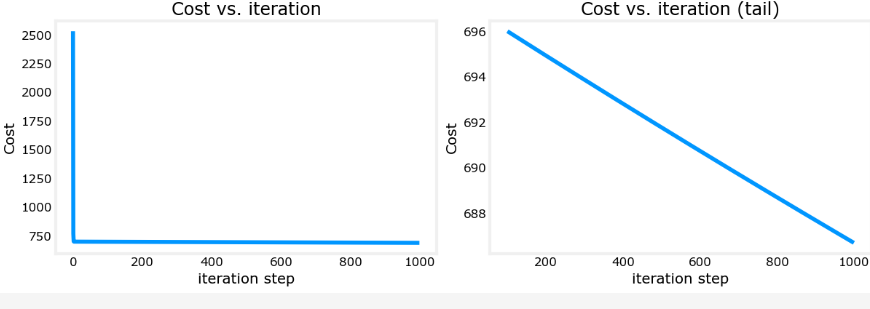

C:\Users\boboi\AppData\Local\Temp\ipykernel_8324\2565684405.py:13: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


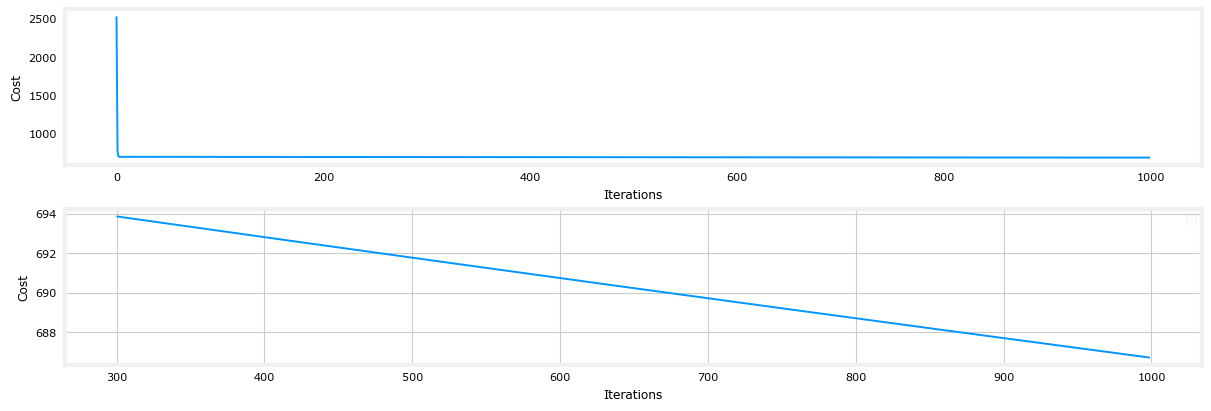

In [480]:
plt.style.use("seaborn-v0_8-paper") # set style to xkcd

fix, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, constrained_layout=True, figsize=(12, 4))
ax1.plot(history)
ax1.set_ylabel('Cost')
ax1.set_xlabel('Iterations')

# plot cost after each iteration
ax2.plot(300 + np.arange(len(history[300:])), history[300:])
ax2.set_ylabel('Cost')
ax2.set_xlabel('Iterations')
plt.grid()
plt.legend()
plt.show()